<a href="https://colab.research.google.com/github/paviayyala/AIML-Lab/blob/main/Week1_Statistics_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Week 1 — Statistics Foundations (Google Colab Notebook)
Five beginner-friendly, hands-on programs with **explanations and comments**.

**What you'll learn this week:**
- Day 1: Descriptive Statistics (mean, median, variance, std dev)
- Day 2: Sampling & Data Types (random sampling, representativeness)
- Day 3: Probability Basics (coin toss, dice rolls)
- Day 4: Conditional Probability & Bayes (from a tiny dataset)
- Day 5: Distributions (Normal, Binomial, Poisson) with visualizations

> Tip: Run each cell in order. Modify parameters and re-run to build intuition.


In [ ]:

# Common imports used across multiple days
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# In Colab, plots will render inline by default.
# We will create each chart in its own figure as good practice.



## Day 1 — Descriptive Statistics
We compute **mean, median, variance, standard deviation** on a simple dataset of exam marks.

**Why this matters:** Most ML models rely on normalized/standardized data. Understanding spread and central tendency helps diagnose skew and outliers.


Marks: [45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
Mean: 67.5
Median: 67.5
Variance: 206.25
Std Dev: 14.361406616345072
Min: 45 | Max: 90


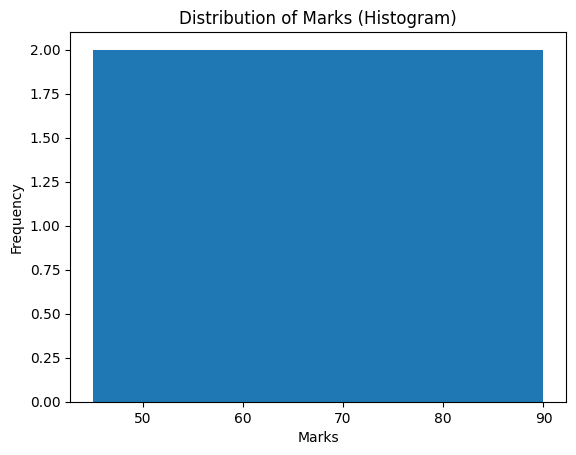

In [ ]:

# --- Day 1: Descriptive Statistics ---
# Dataset: exam marks out of 100
marks = [45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

mean_val = np.mean(marks)
median_val = np.median(marks)
var_val = np.var(marks)        # population variance
std_val = np.std(marks)        # population std deviation
min_val = np.min(marks)
max_val = np.max(marks)

print("Marks:", marks)
print("Mean:", mean_val)
print("Median:", median_val)
print("Variance:", var_val)
print("Std Dev:", std_val)
print("Min:", min_val, "| Max:", max_val)

# Quick visualization (histogram) to see distribution
plt.figure()
plt.hist(marks, bins=5)  # Do not set colors explicitly
plt.title("Distribution of Marks (Histogram)")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()



## Day 2 — Sampling & Data Types
We simulate **random sampling** from a population. This helps you understand how small samples represent the larger population.

**Why this matters:** In experiments and A/B tests, you rarely have the entire population; proper sampling ensures fairness and validity.


Population size: 1000
Sample size: 30
First 10 of Sample: [277, 280, 340, 815, 858, 55, 874, 301, 118, 505]
Population Mean: 500.5
Sample Mean: 530.4666666666667


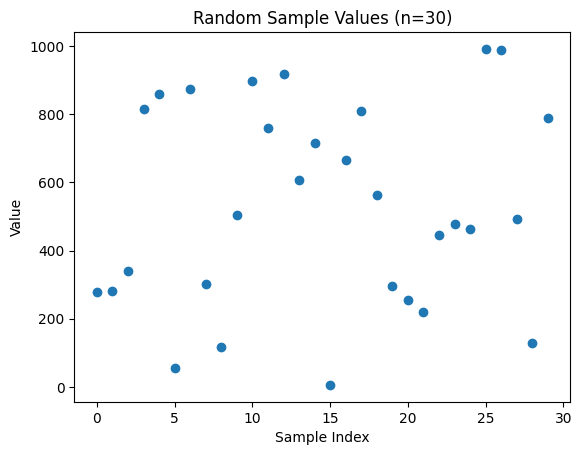

In [ ]:

# --- Day 2: Sampling & Data Types ---
# Population: integers 1..1000 (could be user IDs, for example)
population = list(range(1, 1001))

# Draw a simple random sample of size n
def draw_sample(pop, n=30, seed=42):
    rng = np.random.default_rng(seed)
    sample_idx = rng.choice(len(pop), size=n, replace=False)
    return [pop[i] for i in sample_idx]

sample_30 = draw_sample(population, n=30, seed=7)

print("Population size:", len(population))
print("Sample size:", len(sample_30))
print("First 10 of Sample:", sample_30[:10])

# Compare means of population vs. sample
pop_mean = np.mean(population)
samp_mean = np.mean(sample_30)
print("Population Mean:", pop_mean)
print("Sample Mean:", samp_mean)

# Visualize: sample points vs population range
plt.figure()
plt.scatter(range(len(sample_30)), sample_30)
plt.title("Random Sample Values (n=30)")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.show()



## Day 3 — Probability Basics (Coin & Dice)
We simulate **coin tosses** and **dice rolls** to build intuition about probability and relative frequencies.

**Why this matters:** Probabilistic thinking underpins classifiers like Naïve Bayes and logistic regression, and later sequence models.


Coin Tosses -> Heads: 87, Tails: 113


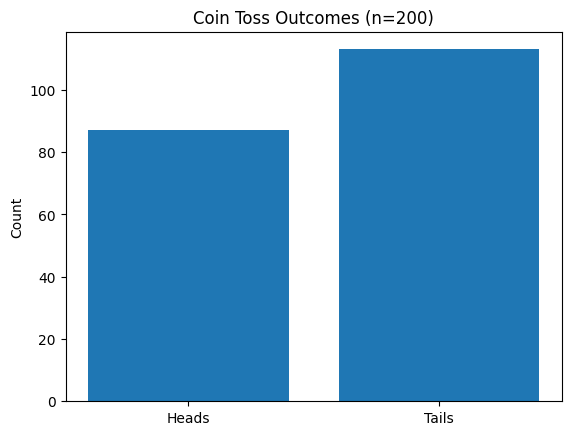

Dice roll counts for faces 1..6: [np.int64(53), np.int64(54), np.int64(51), np.int64(39), np.int64(59), np.int64(44)]


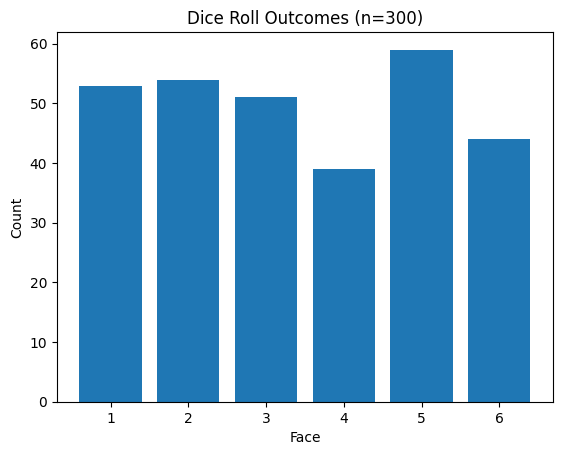

In [ ]:

# --- Day 3: Probability Basics ---
rng = np.random.default_rng(123)

# Coin toss simulation
def simulate_coin_tosses(n=100):
    # 1 for Heads, 0 for Tails
    tosses = rng.integers(0, 2, size=n)
    heads = np.sum(tosses == 1)
    tails = n - heads
    return heads, tails, tosses

heads, tails, tosses = simulate_coin_tosses(n=200)
print(f"Coin Tosses -> Heads: {heads}, Tails: {tails}")

plt.figure()
plt.bar(["Heads", "Tails"], [heads, tails])
plt.title("Coin Toss Outcomes (n=200)")
plt.ylabel("Count")
plt.show()

# Dice roll simulation
def simulate_dice_rolls(n=300):
    # Values 1..6
    rolls = rng.integers(1, 7, size=n)
    counts = [np.sum(rolls == face) for face in range(1, 7)]
    return counts, rolls

counts, rolls = simulate_dice_rolls(n=300)
print("Dice roll counts for faces 1..6:", counts)

plt.figure()
plt.bar([1,2,3,4,5,6], counts)
plt.title("Dice Roll Outcomes (n=300)")
plt.xlabel("Face")
plt.ylabel("Count")
plt.show()



## Day 4 — Conditional Probability & Bayes (Tiny Dataset)
We compute **P(Pass)**, **P(Study)**, and **P(Pass | Study)** from a tiny dataset. This is the foundation for **Naïve Bayes** later.

**Why this matters:** Many real-world decisions are conditional (e.g., probability of illness given a positive test).


P(Pass): 0.533
P(Study): 0.6
P(Pass ∩ Study): 0.533
P(Pass | Study): 0.889


<Figure size 640x480 with 0 Axes>

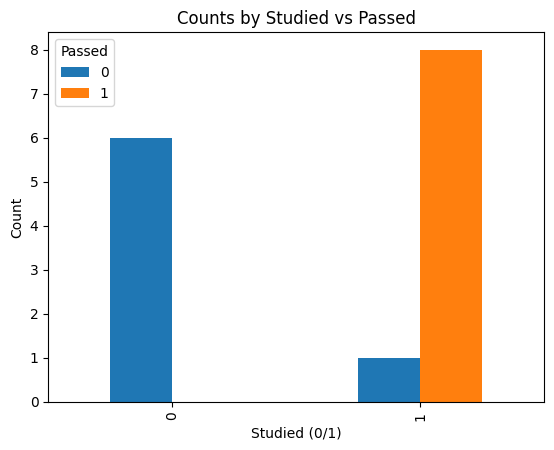

In [ ]:

# --- Day 4: Conditional Probability & Bayes ---
# Tiny dataset: 1 = yes, 0 = no
data = {
    "Studied": [1,1,0,1,0,0,1,1,0,1, 0,1,0,1,1],
    "Passed":  [1,1,0,1,0,0,1,0,0,1, 0,1,0,1,1]
}
df = pd.DataFrame(data)

P_pass = df["Passed"].mean()
P_study = df["Studied"].mean()
P_pass_and_study = df[(df["Studied"]==1) & (df["Passed"]==1)].shape[0] / len(df)
P_pass_given_study = P_pass_and_study / P_study if P_study > 0 else np.nan

print("P(Pass):", round(P_pass, 3))
print("P(Study):", round(P_study, 3))
print("P(Pass ∩ Study):", round(P_pass_and_study, 3))
print("P(Pass | Study):", round(P_pass_given_study, 3))

# Visualize counts by group (Studied vs Passed)
counts = df.groupby(["Studied","Passed"]).size().unstack(fill_value=0)

plt.figure()
counts.plot(kind="bar")  # separate figure still due to plt.figure() above; plot creates its own axes
plt.title("Counts by Studied vs Passed")
plt.xlabel("Studied (0/1)")
plt.ylabel("Count")
plt.show()



## Day 5 — Distributions (Normal, Binomial, Poisson)
We **plot** common distributions to see their shapes and intuitions.

- **Normal:** many natural measurements (heights, test scores)
- **Binomial:** number of successes in fixed trials (e.g., coin tosses)
- **Poisson:** counts of events in a fixed interval (e.g., calls per hour)


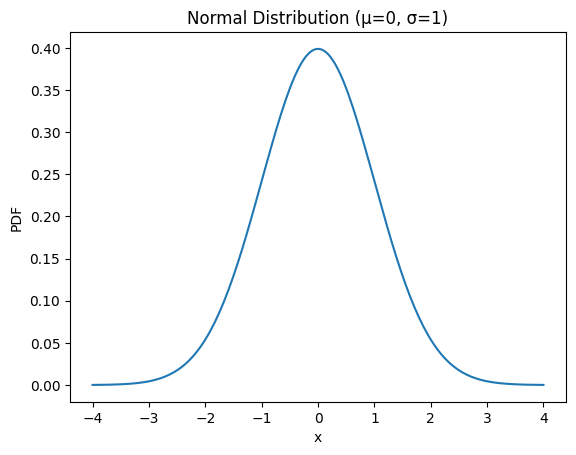

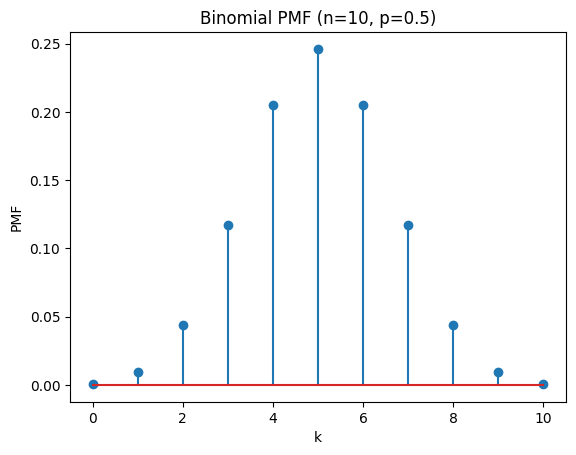

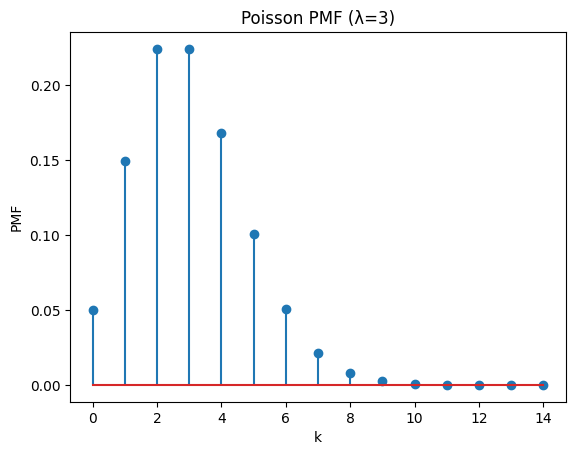

In [ ]:
# --- Day 5: Distributions ---
import math
from math import factorial

# Normal distribution (PDF) helper
def normal_pdf(x, mu=0.0, sigma=1.0):
    return (1.0/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)

# Binomial PMF helper
def binomial_pmf(k, n, p):
    from math import comb
    return comb(n, k) * (p**k) * ((1-p)**(n-k))

# Poisson PMF helper
def poisson_pmf(k, lam):
    return (lam**k) * np.exp(-lam) / math.factorial(k)

# 1) Normal Distribution (single plot)
x = np.linspace(-4, 4, 200)
y = normal_pdf(x, mu=0, sigma=1)
plt.figure()
plt.plot(x, y)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.show()

# 2) Binomial Distribution (single plot)
n, p = 10, 0.5
k_vals = np.arange(0, n+1)
pmf_binom = [binomial_pmf(k, n, p) for k in k_vals]
plt.figure()
plt.stem(k_vals, pmf_binom)
plt.title("Binomial PMF (n=10, p=0.5)")
plt.xlabel("k")
plt.ylabel("PMF")
plt.show()

# 3) Poisson Distribution (single plot)
lam = 3
k_vals_p = np.arange(0, 15)
pmf_pois = [poisson_pmf(k, lam) for k in k_vals_p]
plt.figure()
plt.stem(k_vals_p, pmf_pois)
plt.title("Poisson PMF (λ=3)")
plt.xlabel("k")
plt.ylabel("PMF")
plt.show()


---
### Practice Exercises
1. **Day 1:** Add two outliers (e.g., -10 and 150) to `marks`. Recompute mean/median/std. What changed more?
2. **Day 2:** Change sample size to 10 and 100. Compare sample mean vs population mean.
3. **Day 3:** Increase coin tosses to 5,000. Do heads and tails get closer to 50-50?
4. **Day 4:** Add more rows to the dataset. How does `P(Pass | Study)` change?
5. **Day 5:** Try `p=0.7` in Binomial and `λ=8` in Poisson. How do shapes change?

*Generated on:* 2025-10-02 11:02:32
